In [4]:
pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-macosx_10_14_x86_64.whl (228.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#get packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error as mse, r2_score as rsq

from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#import tensorflow as tf
#import tensorflow.keras as keras

In [1]:
#%% Exercises 1

#define function for time series
def ts(a,b,w,phi,t): #to generate time series
    nois = np.random.normal(loc=1,scale=5, size=201)
    return a + b * np.sin(w*t + phi) + 0.3 * nois

In [6]:
#compute time series
t = np.arange(-100,101)
Y = ts(0.75,4.5,0.07,1.6,t)

In [7]:
#curve fitting to predict time series
def sinfunc(A,B,C,D,t):
    return A + B * np.sin(C*t + D)
(a,b,c,d), pcov = curve_fit(sinfunc, t, Y, p0=(1,5,0.06,2))
pred = sinfunc(a, b, c, d, t)

In [8]:
#get errors
r2 = rsq(Y,pred)

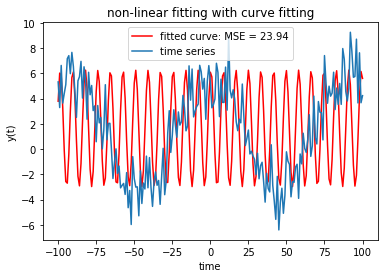

In [9]:
#plot curve fitting
fig = plt.figure()
plt.plot(t, pred,'r-', label = "fitted curve: MSE = %3.2f" %(mse(Y,pred)))
plt.plot(t,Y,label = "time series")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.title('non-linear fitting with curve fitting')
plt.savefig("1a.png")

In [10]:
#%%shallow learning model to predict time series 
t_train, t_test, Y_train, Y_test = train_test_split(t,Y,test_size= 0.25)
#data spliting caution becaus we have time series data, shuffeling not allowed
# t_train, t_test, Y_train, Y_test = train_test_split(t,Y,test_size= 0.25,  shuffle=False)

In [11]:
#%% 1 Random Forest
#building model and fitting it -> makeing predictions
rf = RandomForestRegressor(n_estimators=20)
rf.fit(t_train[:,np.newaxis],Y_train)

RandomForestRegressor(n_estimators=20)

In [12]:
pred = rf.predict(t_train[:,np.newaxis])
pred_final = rf.predict(t_test[:,np.newaxis])

In [13]:
print("RF Training MSE: %3.3f " %(mse(Y_train,pred)))
print("RF Final MSE: %3.3f " %(mse(Y_test,pred_final)))

RF Training MSE: 0.591 
RF Final MSE: 3.587 


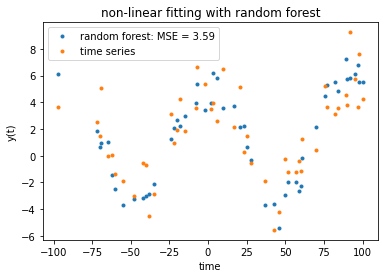

In [14]:
#plot random forest
fig1 = plt.figure()
plt.plot(t_test, pred_final,'.', label = "random forest: MSE = %3.2f" %(mse(Y_test,pred_final)))
plt.plot(t_test,Y_test,'.', label = "time series")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.title('non-linear fitting with random forest')
plt.savefig("1b.png")

In [15]:
# 2 Support Vector Machines
sv = svm.SVR()
sv.fit(t_train.reshape(-1,1),Y_train)
print("Testing score: ,", sv.score(t_test.reshape(-1,1),Y_test))

Testing score: , 0.6222022837320451


In [16]:
#%%deep learning
#custom activation function
def sin_act(x):
    return tf.sin(x)
#lsin = keras.layers.Dense(100,activation=sin_act)

In [17]:
#build model
inp = keras.layers.Input(shape=[1])
lsin = keras.layers.Dense(100,activation=sin_act) (inp)
lc = keras.layers.Concatenate()([inp,lsin])
out = keras.layers.Dense(1, activation = "linear") (lc)
model2 = keras.models.Model(inputs=[inp], outputs=[out])

NameError: name 'keras' is not defined